In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
df = pd.read_csv("Assignment.csv")

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            10 non-null     object
 1   User Name          10 non-null     object
 2   Age                10 non-null     int64 
 3   Location           10 non-null     object
 4   Registration Date  10 non-null     object
 5   Phone              10 non-null     object
 6   Email              10 non-null     object
 7   Favorite Meal      10 non-null     object
 8   Total Orders       10 non-null     int64 
dtypes: int64(2), object(7)
memory usage: 848.0+ bytes
None


In [17]:
print(df)

  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   
5    U006    Frank Green   25         Austin        2023-06-15  888-777-6666   
6    U007     Grace King   38         Boston        2023-07-02  999-888-7777   
7    U008      Henry Lee   31          Miami        2023-08-11  101-202-3030   
8    U009    Irene Moore   33         Dallas        2023-09-01  202-303-4040   
9    U010     Jack White   29        Phoenix        2023-10-10  303-404-5050   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.

In [18]:
user_details = pd.read_csv('UserDetails.csv')  # Replace with the actual file path
cooking_sessions = pd.read_csv('CookingSessions.csv')
order_details = pd.read_csv('OrderDetails.csv')

In [19]:
user_details_cleaned = user_details.drop_duplicates()
user_details_cleaned['Age'].fillna(user_details['Age'].mean(), inplace=True)

In [20]:
cooking_sessions_cleaned = cooking_sessions.drop_duplicates()
cooking_sessions_cleaned['Session Start'] = pd.to_datetime(cooking_sessions_cleaned['Session Start'])
cooking_sessions_cleaned['Session End'] = pd.to_datetime(cooking_sessions_cleaned['Session End'])

In [21]:
order_details_cleaned = order_details.drop_duplicates()
order_details_cleaned['Order Date'] = pd.to_datetime(order_details_cleaned['Order Date'])

In [22]:
#step 2 : Merge the data
merged_data1 = pd.merge(cooking_sessions_cleaned, user_details_cleaned, on='User ID', how='left')
final_data = pd.merge(merged_data1, order_details_cleaned, on=['User ID', 'Dish Name'], how='left')


In [23]:
# Step 3: Analyze the Relationship Between Cooking Sessions and User Orders
session_order_corr = final_data.groupby('User ID').agg(
    sessions_count=('Session ID_x', 'nunique'),
    orders_count=('Order ID', 'nunique')
).reset_index()
correlation = session_order_corr[['sessions_count', 'orders_count']].corr()

In [24]:
# Step 4: Identify Popular Dishes
popular_dishes = final_data['Dish Name'].value_counts().head(10)

In [25]:
# Step 5: Explore Demographic Factors
# Influence of Age on Orders
age_analysis = final_data.groupby('Age').agg(
    average_orders=('Order ID', 'count')
).reset_index()

In [26]:
# Influence of Location on Orders
location_analysis = final_data.groupby('Location').agg(
    orders_count=('Order ID', 'count')
).reset_index()

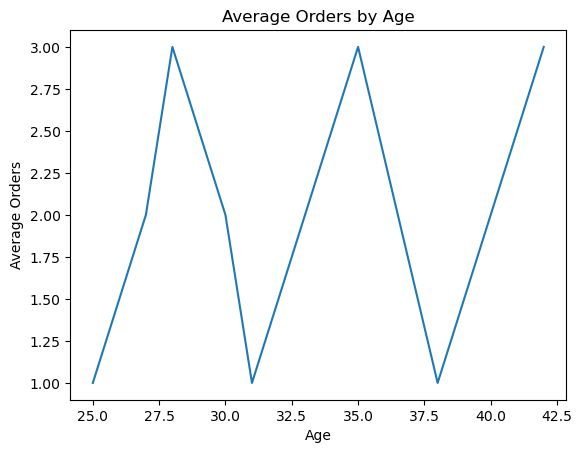

In [27]:
# Visualizations
# Age vs Orders
sns.lineplot(data=age_analysis, x='Age', y='average_orders')
plt.title('Average Orders by Age')
plt.xlabel('Age')
plt.ylabel('Average Orders')
plt.show()

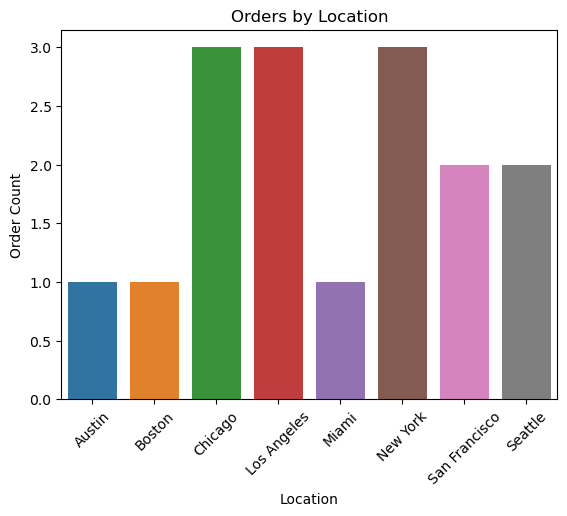

In [28]:
# Location vs Orders
sns.barplot(data=location_analysis, x='Location', y='orders_count')
plt.title('Orders by Location')
plt.xlabel('Location')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Step 6: Save Results
final_data.to_csv('Cleaned_Merged_Data.csv', index=True)
print("Cleaned and merged data saved as 'Cleaned_Merged_Data.csv'")

Cleaned and merged data saved as 'Cleaned_Merged_Data.csv'


In [32]:
# Outputs
print("Correlation between cooking sessions and orders:\n", correlation)
print("\nTop 5 Popular Dishes:\n", popular_dishes)
print("\nAge Analysis:\n", age_analysis.head())
print("\nLocation Analysis:\n", location_analysis.head())

Correlation between cooking sessions and orders:
                 sessions_count  orders_count
sessions_count             1.0           1.0
orders_count               1.0           1.0

Top 5 Popular Dishes:
 Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: Dish Name, dtype: int64

Age Analysis:
    Age  average_orders
0   25               1
1   27               2
2   28               3
3   30               2
4   31               1

Location Analysis:
       Location  orders_count
0       Austin             1
1       Boston             1
2      Chicago             3
3  Los Angeles             3
4        Miami             1
